In [2]:
from model.vgg_model import *

/home/ken/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/ken/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/ken/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/ken/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:519: 

In [ ]:
runConfusion("vgg16-model-35-progress-report.hdf5", "Confusion Matrix VGG16 Based Model")

In [9]:
def runTestFinalReport(model_path):
    project_root = os.getcwd()
    if os.path.exists(model_path):
        model = load_model(model_path)

    data_dir = os.path.join(project_root, 'data', 'data2.pickle')
    input_data = process_data(data_dir)
    num_samples, x_input, y_input = getDataByType(input_data, 'test')
    
    match_cnt = 0
    mismatched_inputs = []
    mismatched_labels = [] #(expected, predicted)
    for i in range(num_samples):
        if i % 1000 == 0:
            print("Testing sample %d out of %d" % (i, num_samples))
        x = x_input[i:i+1]
        y = y_input[i:i+1]

        score = model.predict(x)
        prediction = np.argmax(score)
        
        if y[0] == prediction:
            match_cnt += 1
        else:
            mismatched_inputs.append(x[0])
            mismatched_labels.append((y[0], prediction))
    
    for i in range(4):
        plt.imshow(mismatched_inputs[i])
        plt.axis('off')
        plt.gcf().set_size_inches(15, 15)
        plt.show()
        plt.close()
        print(mismatched_labels[:i])
        

Testing sample 0 out of 12630
Testing sample 1000 out of 12630
Testing sample 2000 out of 12630
Testing sample 3000 out of 12630
Testing sample 4000 out of 12630
Testing sample 5000 out of 12630
Testing sample 6000 out of 12630
Testing sample 7000 out of 12630
Testing sample 8000 out of 12630
Testing sample 9000 out of 12630
Testing sample 10000 out of 12630
Testing sample 11000 out of 12630
Testing sample 12000 out of 12630


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


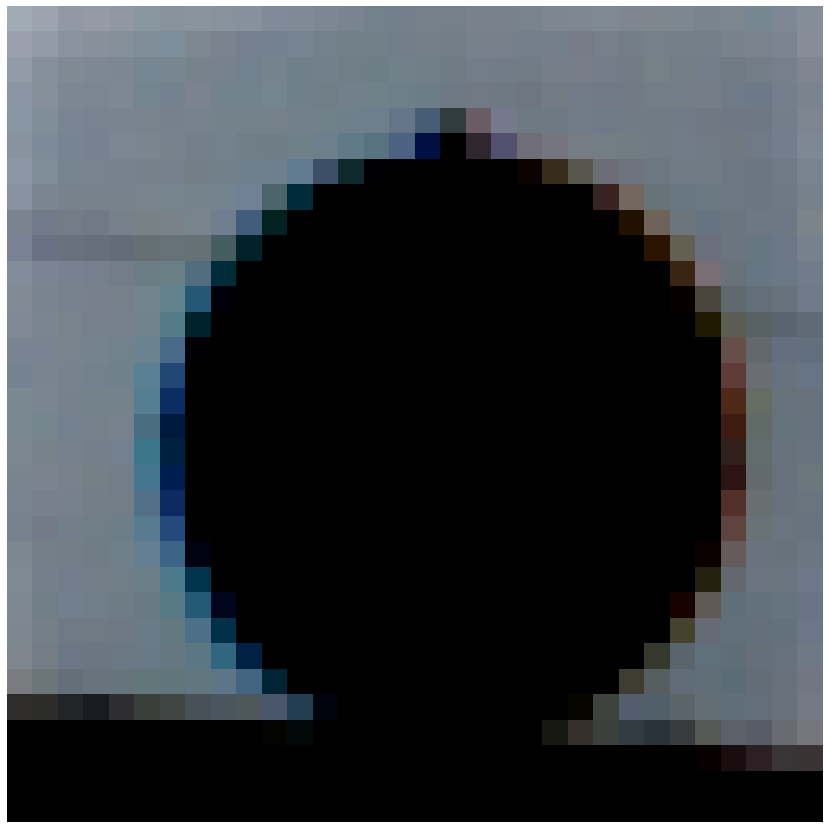

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[]


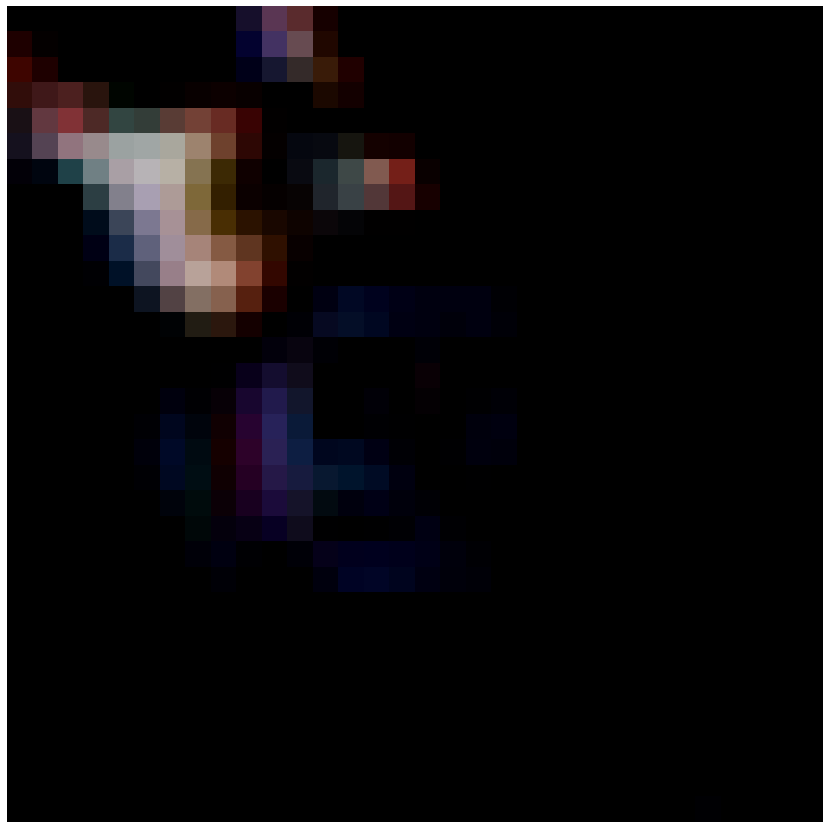

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[(7, 5)]


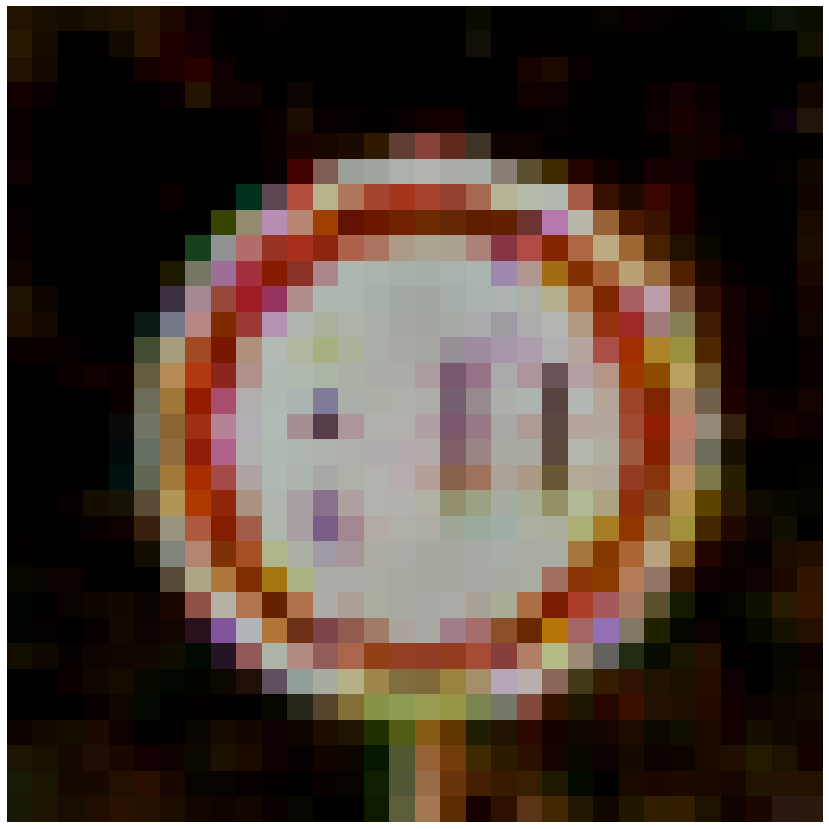

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[(7, 5), (2, 1)]


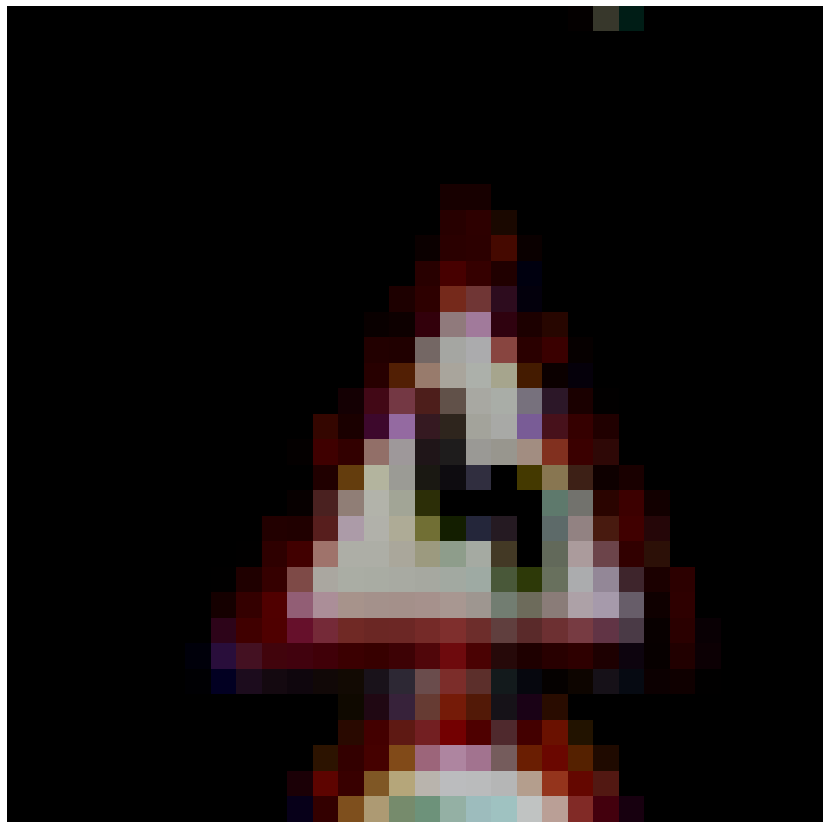

[(7, 5), (2, 1), (2, 3)]


In [10]:
project_root = os.getcwd()
model_dir = os.path.join(project_root, 'checkpoints')
model_path = os.path.join(model_dir, 'vgg16-model-35-progress-report.hdf5')
runTestFinalReport(model_path)

In [ ]:
runMain()